In [225]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [226]:
dataset = pd.read_csv('pinjaman_buku_2019.csv')

In [227]:
dataset.head()

,Judul Buku,Jumlah Pinjaman,Lama Pinjaman (Hari)
0,101 Kisah,26,3
1,360 Days of Wonder,16,5
2,500 Tanda Jawab Transaksi Syariah Sehari-hari,21,1
3,Api Tauhid,6,2
4,Atlas Sejarah Nabi Muhammad SAW,35,3


In [228]:
X = dataset.iloc[:,[1,2]].values

<function matplotlib.pyplot.show(close=None, block=None)>

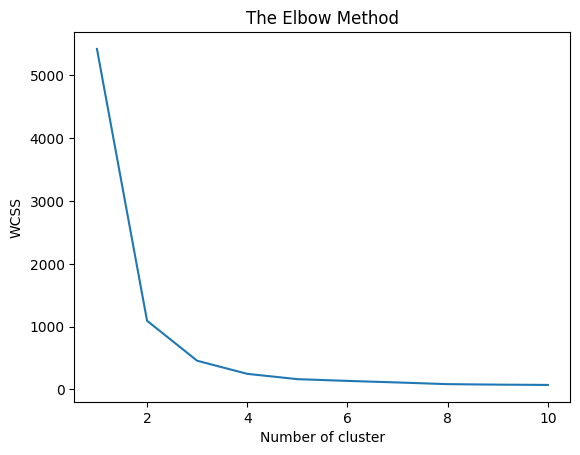

In [229]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)   
plt.title('The Elbow Method') 
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show

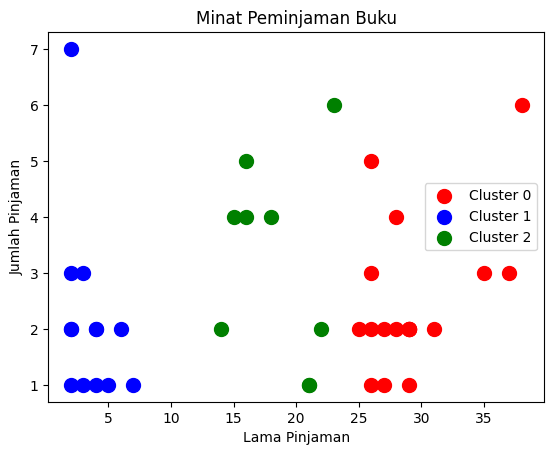

In [232]:
# Perform K-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to the dataset
dataset['Cluster'] = y_kmeans

# Scatter plot with clusters and centroids
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 2')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Minat Peminjaman Buku')
plt.xlabel('Lama Pinjaman')
plt.ylabel('Jumlah Pinjaman')
plt.legend()
plt.show()

In [231]:
# Create a list to store cluster information
cluster_data = []

# Iterate through clusters
for cluster_num in range(3):
    # Filter dataset for each cluster
    cluster_books = dataset.loc[dataset['Cluster'] == cluster_num, 'Judul Buku'].tolist()
    # Append cluster information to the list
    cluster_data.append({'Cluster': f'Cluster {cluster_num + 1}', 'Books': ', '.join(cluster_books)})

# Convert the list to a DataFrame
cluster_table = pd.DataFrame(cluster_data)

print(cluster_table)


     Cluster                                              Books
0  Cluster 1  101 Kisah, Atlas Sejarah Nabi Muhammad SAW, Be...
1  Cluster 2  Api Tauhid, Ayah, Ayahku Bukan Pembohong, Ayat...
2  Cluster 3  360 Days of Wonder, 500 Tanda Jawab Transaksi ...
